## Импорт данных

In [163]:
# Импорт данных
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('dump.csv', delimiter=';')
df.head(10)

,Country,S,Population,Density,Power generation
0,Австралия,7686850,25161000,3.273,235000
1,Австрия,83870,8579747,102.298,59000
2,Азербайджан,86600,9730500,112.361,23000
3,Албания,28748,2886026,100.390,4700
4,Алжир,2381740,40375954,16.952,60000
5,Ангола,1246700,25830958,20.719,9200


In [164]:
# Страну делаем индексом
df.set_index('Country', inplace=True)
df.head(10)

,S,Population,Density,Power generation
Country,,,,
Австралия,7686850,25161000,3.273,235000
Австрия,83870,8579747,102.298,59000
Азербайджан,86600,9730500,112.361,23000
Албания,28748,2886026,100.390,4700
Алжир,2381740,40375954,16.952,60000
Ангола,1246700,25830958,20.719,9200


## Корреляция Пиросна

In [165]:
pearson_correlation_matrix = df.corr(method ='pearson').round(5)
pearson_correlation_matrix

,S,Population,Density,Power generation
S,1.00000,0.51186,-0.75914,0.94579
Population,0.51186,1.00000,-0.87385,0.32469
Density,-0.75914,-0.87385,1.00000,-0.55416
Power generation,0.94579,0.32469,-0.55416,1.00000


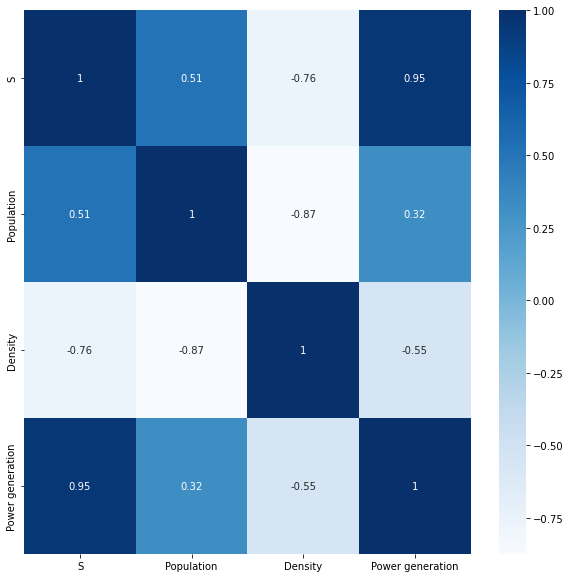

In [166]:
plt.subplots(figsize=(10, 10))
sns.heatmap(data=pearson_correlation_matrix, annot=True, cmap='Blues');

## Корреляция Кендалла

In [167]:
kendall_correlation_matrix = df.corr(method ='kendall').round(5)
kendall_correlation_matrix

,S,Population,Density,Power generation
S,1.00000,0.73333,-0.60000,0.60000
Population,0.73333,1.00000,-0.33333,0.33333
Density,-0.60000,-0.33333,1.00000,-0.46667
Power generation,0.60000,0.33333,-0.46667,1.00000


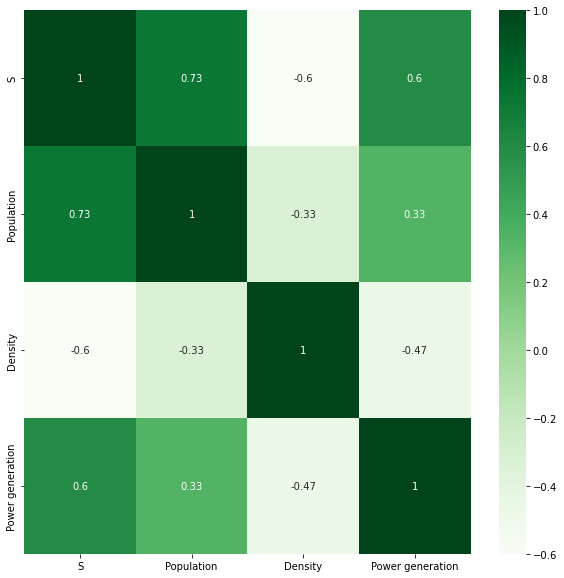

In [168]:
plt.subplots(figsize=(10, 10))
sns.heatmap(data=kendall_correlation_matrix, annot=True, cmap='Greens');

## Корреляция Спирмена

In [169]:
spearman_correlation_matrix = df.corr(method ='spearman').round(5)
spearman_correlation_matrix

,S,Population,Density,Power generation
S,1.00000,0.82857,-0.77143,0.77143
Population,0.82857,1.00000,-0.60000,0.48571
Density,-0.77143,-0.60000,1.00000,-0.54286
Power generation,0.77143,0.48571,-0.54286,1.00000


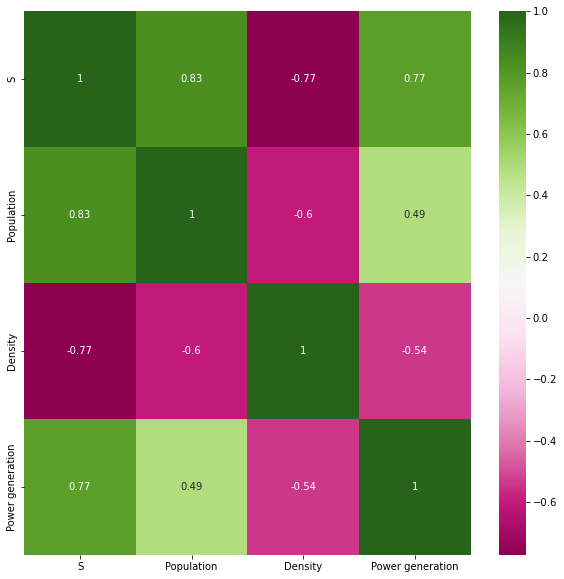

In [170]:
plt.subplots(figsize=(10, 10))
sns.heatmap(data=spearman_correlation_matrix, annot=True, cmap='PiYG');

## Корреляция Кендалла без библиотек

In [171]:
def calc_corr(x, y):
    n = x.size
    # Сортируем по возрастанию x
    for i in range(n):
        for j in range(n - i - 1):
            if x[j] > x[j + 1]:
                x[j], x[j + 1] = x[j + 1], x[j]
                y[j], y[j + 1] = y[j + 1], y[j]
    
    # Вычисление рангов y
    z = np.zeros(n)
    for i in range(n):
        z[i] = len([y[j] for j in range(n) if y[i] > y[j]]) + 1
    
    p = 0
    for i in range(n):
        for j in range(i + 1, n):
            if z[i] < z[j]:
                p += 1
    
    return round(4 * p / (n * (n - 1)) - 1, 5)

In [172]:
n = 4
res = np.zeros( (n, n) )
for i in range(n):
    for j in range(n):
        res[i, j] = calc_corr(np.array(df.iloc[:, i]), np.array(df.iloc[:, j]))
print(res)

[[ 1.       0.73333 -0.6      0.6    ]
 [ 0.73333  1.      -0.33333  0.33333]
 [-0.6     -0.33333  1.      -0.46667]
 [ 0.6      0.33333 -0.46667  1.     ]]


In [173]:
kendall_correlation_matrix

,S,Population,Density,Power generation
S,1.00000,0.73333,-0.60000,0.60000
Population,0.73333,1.00000,-0.33333,0.33333
Density,-0.60000,-0.33333,1.00000,-0.46667
Power generation,0.60000,0.33333,-0.46667,1.00000
